# Evaluate the SCALES model with the labels

This notebook outlines the steps undertook to eveluate the SCALES model and the evaluation results.

# Import libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

# Load the data

In [2]:
df = pd.read_csv("data/entry_label_review_output.csv")
df = df[["unique_id", "text", "scales_pred", "scales_score", "scales_event"]]
df.head()

,unique_id,text,scales_pred,scales_score,scales_event
0,16152014-106017494-110310468,Chapter 7 Trustee's Report of No Distribution ...,transferred entry,0.511277,other
1,16152014-104874079-109155849,Personal Financial Management Course Certifica...,bilateral,0.719713,other
2,16152014-101647924-105904353,Notice of Appearance and Request for Notice by...,notice,1.000000,notice
3,16152014-101434506-105689526,BNC Certificate of Mailing Notice Date 09/07/2...,notice,0.999263,other
4,16152014-101434507-105689527,BNC Certificate of Mailing - Meeting of Credit...,notice,0.993311,other


In [3]:
len(df)

2228

# Clean up the predictions for eval

In [4]:
df = df[~df.duplicated('text', keep=False) | df.duplicated('text', keep='first')]
len(df)

2185

In [5]:
df["scales_pred"] = df["scales_pred"].replace("settlement reached", "settlement").replace("consent decree", "consent decree settlement")

In [6]:
classes = [
    "answer",
    "arrest",
    "brief",
    "minute entry",
    "motion",
    "notice",
    "order",
    "petition",
    "complaint",
    "error",
    "findings of fact",
    "indictment",
    "information",
    "judgment",
    "plea agreement",
    "response",
    "stipulation",
    "summons",
    "transfer",
    "waiver",
    "warrant",
    "verdict",
    "settlement",
    "motion for summary judgment",
    "motion for time extension",
    "motion to dismiss",
    "motion to seal",
    "notice of appeal",
    "notice of dismissal",
    "notice of motion",
    "consent decree settlement"
]

df['scales_pred'] = df['scales_pred'].where(df['scales_pred'].isin(classes), "other")

In [7]:
df["scales_pred"].value_counts()

scales_pred
order                          504
other                          430
notice                         368
motion                         236
minute entry                    97
complaint                       90
response                        80
summons                         51
error                           40
petition                        40
judgment                        30
brief                           28
settlement                      24
waiver                          23
transfer                        22
answer                          21
verdict                         15
indictment                      12
warrant                         12
arrest                          11
stipulation                      9
motion to dismiss                7
findings of fact                 6
information                      6
notice of motion                 5
motion for summary judgment      4
plea agreement                   4
consent decree settlement        3
notice o

In [8]:
df["scales_pred"].unique()

array(['other', 'notice', 'order', 'complaint', 'petition', 'judgment',
       'response', 'motion', 'motion to dismiss', 'summons', 'indictment',
       'transfer', 'information', 'notice of dismissal', 'error', 'brief',
       'findings of fact', 'notice of motion', 'verdict', 'minute entry',
       'warrant', 'consent decree settlement', 'settlement', 'waiver',
       'answer', 'arrest', 'stipulation', 'motion for time extension',
       'motion for summary judgment', 'plea agreement',
       'notice of appeal', 'motion to seal'], dtype=object)

In [9]:
df["scales_event"].unique()

array(['other', 'notice', 'order', 'multiple', 'petition', 'motion',
       'response', 'motion for time extension', 'summons', 'complaint',
       'indictment', 'transfer', 'notice of motion', 'error',
       'findings of fact', 'minute entry', 'answer', 'judgment',
       'stipulation', 'verdict', 'brief', 'motion to dismiss',
       'motion to seal', 'plea agreement', 'waiver', 'arrest',
       'notice of appeal', 'motion for summary judgment', 'warrant',
       'information'], dtype=object)

In [10]:
set(list(df["scales_pred"].unique())) - set(list(df["scales_event"].unique()))

{'consent decree settlement', 'notice of dismissal', 'settlement'}

In [11]:
set(list(df["scales_event"].unique())) - set(list(df["scales_pred"].unique()))

{'multiple'}

In [12]:
df = df[df["scales_event"] != "multiple"]
len(df)

2157

In [13]:
set(list(df["scales_pred"].unique())) - set(list(df["scales_event"].unique()))

{'consent decree settlement', 'notice of dismissal', 'settlement'}

In [14]:
set(list(df["scales_event"].unique())) - set(list(df["scales_pred"].unique()))

set()

# Run the eval

In [15]:
y_true = df["scales_event"]
y_pred = df["scales_pred"]

In [16]:
labels = np.unique(np.concatenate((y_true, y_pred)))
len(labels)

32

In [17]:
labels

array(['answer', 'arrest', 'brief', 'complaint',
       'consent decree settlement', 'error', 'findings of fact',
       'indictment', 'information', 'judgment', 'minute entry', 'motion',
       'motion for summary judgment', 'motion for time extension',
       'motion to dismiss', 'motion to seal', 'notice',
       'notice of appeal', 'notice of dismissal', 'notice of motion',
       'order', 'other', 'petition', 'plea agreement', 'response',
       'settlement', 'stipulation', 'summons', 'transfer', 'verdict',
       'waiver', 'warrant'], dtype=object)

In [18]:
report = classification_report(y_true, y_pred)
print(report)

                             precision    recall  f1-score   support

                     answer       0.95      0.91      0.93        22
                     arrest       1.00      1.00      1.00        11
                      brief       0.75      0.40      0.53        52
                  complaint       0.65      0.97      0.78        60
  consent decree settlement       0.00      0.00      0.00         0
                      error       0.60      0.80      0.69        30
           findings of fact       0.17      1.00      0.29         1
                 indictment       0.92      1.00      0.96        11
                information       0.83      0.83      0.83         6
                   judgment       0.57      0.71      0.63        24
               minute entry       0.94      0.83      0.88       109
                     motion       0.59      0.86      0.70       161
motion for summary judgment       1.00      0.80      0.89         5
  motion for time extension      

/Users/rachelgao/anaconda3/envs/flp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rachelgao/anaconda3/envs/flp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rachelgao/anaconda3/envs/flp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

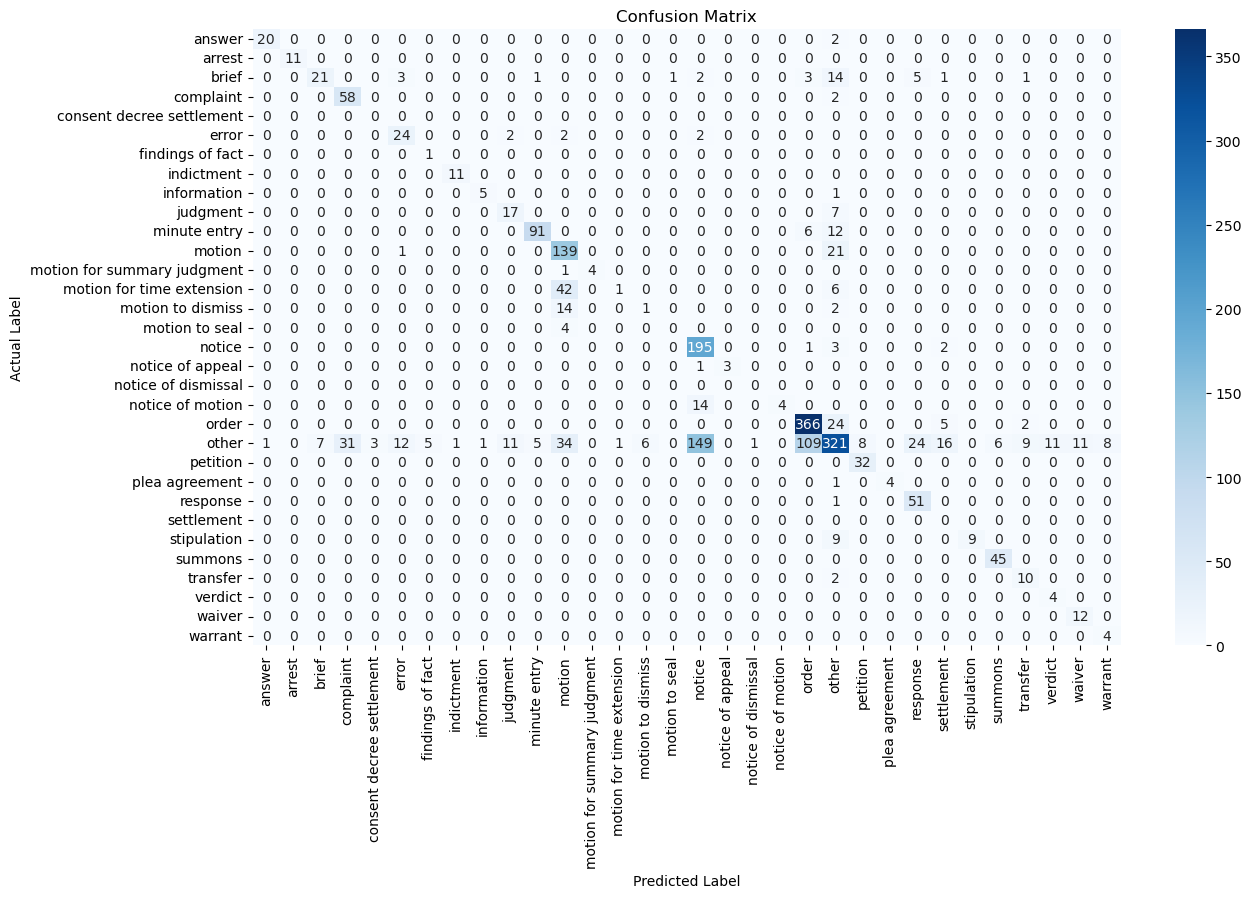

In [19]:
# Compute confusion matrix

cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(14, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
df.to_csv("data/entry_label_assign.csv", index=False)